In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from collections import Counter


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1937,ham,The fact that you're cleaning shows you know w...,"\"" not \""what i need to do.\""""",NaN,NaN
3309,ham,Oh ho. Is this the first time u use these type...,NaN,NaN,NaN
5339,ham,You'd like that wouldn't you? Jerk!,NaN,NaN,NaN
1935,ham,Did either of you have any idea's? Do you know...,NaN,NaN,NaN
4922,ham,Oh yah... We never cancel leh... Haha,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# drops a column
df.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace= True)

In [13]:
df.sample(5)

,v1,v2
1169,ham,Msgs r not time pass.They silently say that I ...
1977,spam,Reply to win å£100 weekly! Where will the 2006...
483,ham,Thank you baby! I cant wait to taste the real ...
834,ham,Surely result will offer:)
121,ham,here is my new address -apples&pairs&all that ...


In [14]:
# renaming columns
df.rename(columns= {'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
2253,ham,Lol enjoy role playing much?
2081,ham,I'm aight. Wat's happening on your side.
4332,ham,Y bishan lei... I tot Ì_ say lavender?
3640,spam,You can stop further club tones by replying \S...
4402,ham,Just getting back home


In [15]:
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])


In [17]:
df.sample(5)

,target,text
5456,1,\For the most sparkling shopping breaks from 4...
2870,0,I actually did for the first time in a while. ...
328,0,"Cool, text me when you're parked"
2769,1,Burger King - Wanna play footy at a top stadiu...
1282,0,Ever green quote ever told by Jerry in cartoon...


In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicates values
df.duplicated().sum()

np.int64(403)

In [21]:
# Remove Duplicates
df = df.drop_duplicates(keep= 'first')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(5169, 2)

In [24]:
# EDA 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

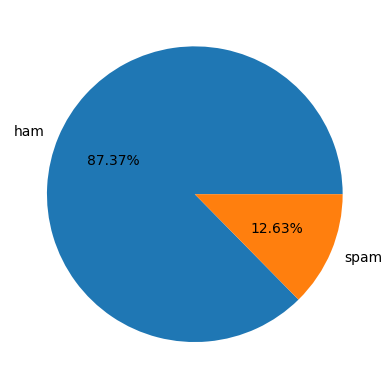

In [26]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.show()

In [27]:
# data is imballanced

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_charecters'] = df['text'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_4644\690832313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charecters'] = df['text'].apply(len)


In [30]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
print(df.columns)

Index(['target', 'text', 'num_charecters'], dtype='object')


In [32]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))


C:\Users\HP\AppData\Local\Temp\ipykernel_4644\257407194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))


In [33]:
df

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [34]:

df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]', str(x))))


C:\Users\HP\AppData\Local\Temp\ipykernel_4644\3701273986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]', str(x))))


In [35]:

df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [36]:
# ham
df[df['target'] == 0][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.384190
std,56.358207,11.116240,2.773408
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,42.000000


In [37]:
# spam
df[df['target'] == 1][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.992343
std,30.137753,5.967672,1.902114
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,13.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

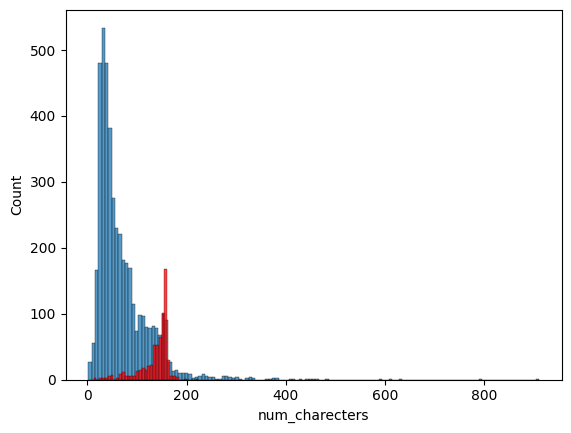

In [38]:
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

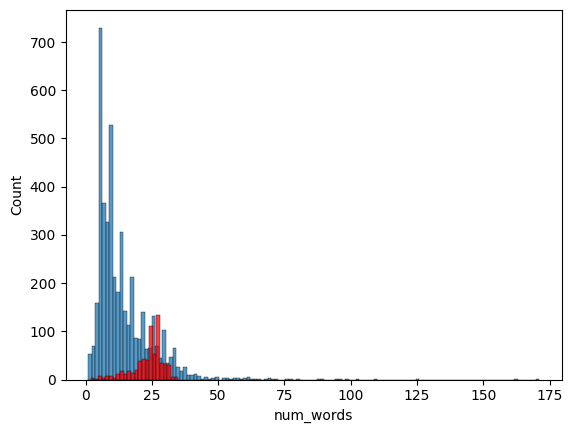

In [39]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

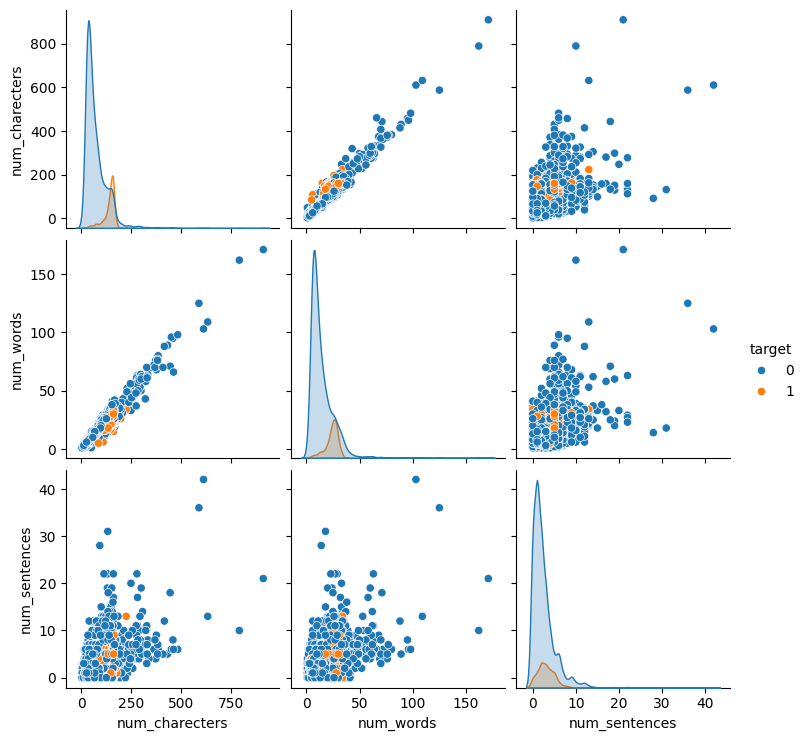

In [40]:
sns.pairplot(df, hue= 'target')

<Axes: >

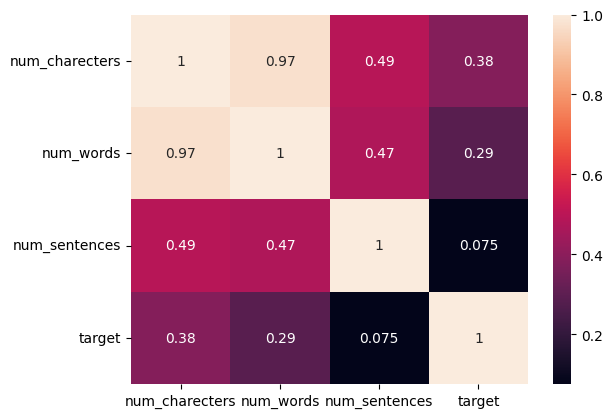

In [41]:
sns.heatmap(df[['num_charecters', 'num_words', 'num_sentences', 'target']].corr(), annot= True)

In [42]:
def transform_txt(text):
    text = text.lower()
    
    return text

In [43]:
transform_txt('Hi how are you')

'hi how are you'

In [44]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():                 # keep only alphabets+numbers
            y.append(i)

    text = y[:]                         # copy list
    y.clear()

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [47]:
ps = PorterStemmer()
ps.stem('dansing')

'dans'

In [48]:
transform_text("Hi!!!! how are   YOU??? 123")

'hi 123 hi how are you 123'

In [49]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [50]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_4644\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [51]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,6,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goes usf lives around though nah i d...


In [52]:
from wordcloud import WordCloud

In [53]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

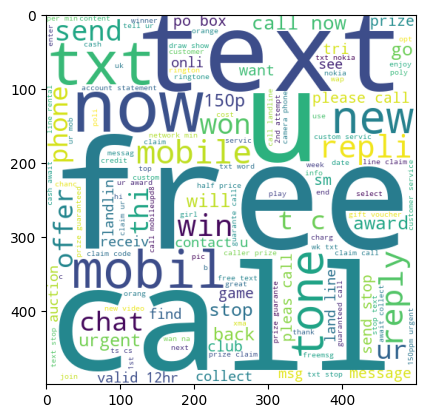

In [55]:
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep= " "))

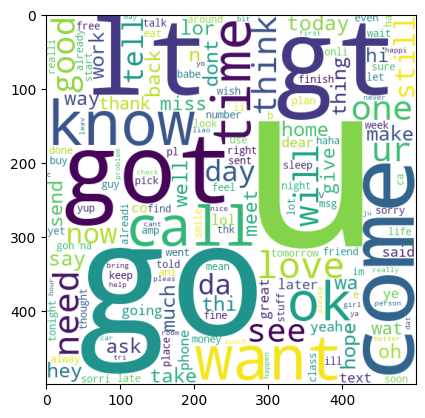

In [57]:
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

24414

In [60]:
# create a dictionary
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,622
1,to,595
2,free,382
3,a,330
4,2,310
5,txt,271
6,you,267
7,your,252
8,u,238
9,ur,238


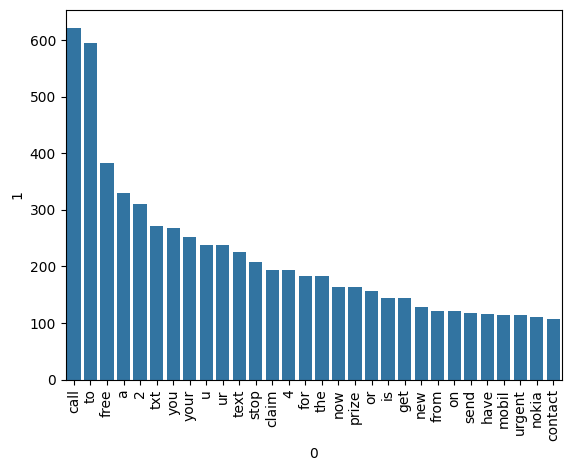

In [61]:

temp = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x=temp[0], y=temp[1])
plt.xticks(rotation=90)
plt.show()


In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)


98216

In [64]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,i,2688
1,you,1865
2,u,1766
3,to,1474
4,the,1047
5,a,955
6,it,842
7,and,823
8,in,753
9,me,730


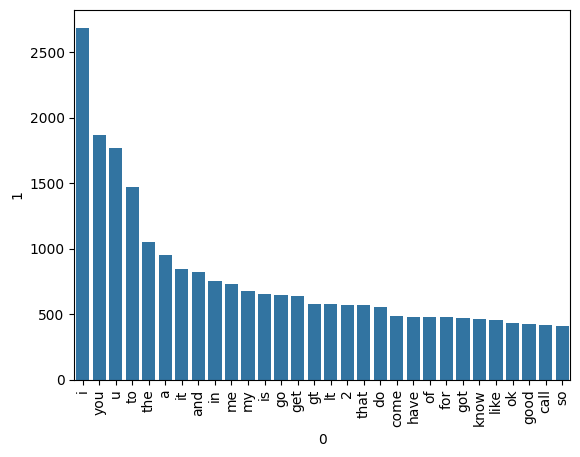

In [65]:
temp = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=temp[0], y=temp[1])
plt.xticks(rotation=90)
plt.show()
